In [1]:
import pandas, numpy
from matplotlib import pyplot
import scipy.stats
from collections import Counter
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.linear_model import LinearRegression, LogisticRegression

In [249]:
baseball_stats = pandas.read_csv("baseball_reference_2016_clean.csv")
savant_stats = pandas.read_csv("baseball_savant_2016.csv")
savant_stats.head()

,Date,Opponent,Barrels,Barrel %,Max EV,Avg EV,Launch Angle,xBA,xSLG,xWOBA,WOBA,Hard Hit %
0,10/2/16,Astros,0,0.0,108.9,86.8,24.1,0.254,0.358,0.326,0.366,32.1
1,10/1/16,Astros,1,4.0,107.0,81.1,10.8,0.192,0.315,0.258,0.187,36.0
2,9/30/16,Astros,1,4.3,110.3,82.6,22.0,0.222,0.353,0.298,0.280,39.1
3,9/28/16,Athletics,1,3.3,106.5,87.2,10.3,0.252,0.403,0.332,0.371,43.3
4,9/27/16,Athletics,2,6.5,104.8,85.1,7.8,0.297,0.499,0.350,0.425,32.3


In [1]:
def shorten_name(full_name):
    if(full_name == 'Los Angeles Angels of Anaheim'):
        return 'Angels'
    elif(full_name == 'Arizona Diamondbacks'):
        return 'D-Backs'
    elif(full_name == 'Chicago White Sox'):
        return 'White Sox'
    elif(full_name == 'Boston Red Sox'):
        return 'Red Sox'
    elif(full_name == 'Toronto Blue Jays'):
        return 'Blue Jays'
    return full_name.split()[-1]

# baseball_stats['away_team'] = baseball_stats['away_team'].apply(shorten_name)
# baseball_stats['home_team'] = baseball_stats['home_team'].apply(shorten_name)

In [250]:
# merged_data = pandas.merge(baseball_stats, savant_stats, left_on='date', right_on='Date')
# merged_data.head()
# merged_data_final = merged_data[merged_data['away_team'] == merged_data['Opponent']]
# merged_data_final.head()

In [2]:
# merged_data = pandas.merge(baseball_stats, savant_stats, left_on='date', right_on='Date')
# merged_data.head()
# merged_data_home = merged_data[merged_data['home_team'] == merged_data['Opponent']]
# merged_data_home.head()

In [248]:
merged_stats = pandas.read_csv("merged_data_final.csv")
merged_stats.head()

,Unnamed: 0,Unnamed: 0.1,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,date,field_type,game_type,...,Away_Barrels,Away_Barrel %,Away_Max EV,Away_Avg EV,Away_Launch Angle,Away_xBA,Away_xSLG,Away_xWOBA,Away_WOBA,Away_Hard Hit %
0,5,0,40030.0,Mets,1,7,3,4/3/16,on grass,Night Game,...,2,8.3,106.2,81.7,14.4,0.218,0.368,0.319,0.273,20.8
1,10,2458,31042.0,Blue Jays,2,7,5,4/3/16,on turf,Day Game,...,1,5.3,108.7,85.6,25.1,0.262,0.348,0.300,0.256,42.1
2,15,2459,39500.0,Cardinals,0,5,1,4/3/16,on grass,Day Game,...,0,0.0,106.7,78.1,9.0,0.188,0.216,0.260,0.225,27.8
3,37,1,21621.0,Phillies,0,5,2,4/6/16,on grass,Night Game,...,3,14.3,110.8,86.4,0.2,0.234,0.442,0.311,0.239,38.1
4,57,2,12622.0,Twins,0,5,2,4/6/16,on grass,Night Game,...,0,0.0,106.2,82.0,27.5,0.152,0.250,0.254,0.291,31.6


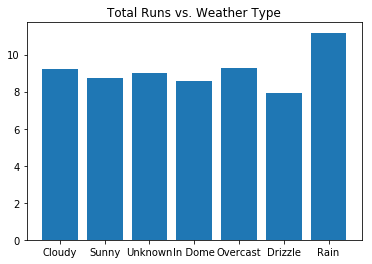

In [220]:
sky_counter = Counter(merged_stats.sky)
sky_runs_dict = {'Cloudy': 0, 'Sunny': 0, 'Unknown': 0, 'In Dome': 0, 'Overcast': 0, 'Drizzle': 0, 'Rain': 0}

for x in merged_stats.values:
    sky_runs_dict[x[20]] += x[21] / sky_counter[x[20]]

pyplot.bar(sky_runs_dict.keys(), sky_runs_dict.values())
pyplot.title("Total Runs vs. Weather Type")
pyplot.show()

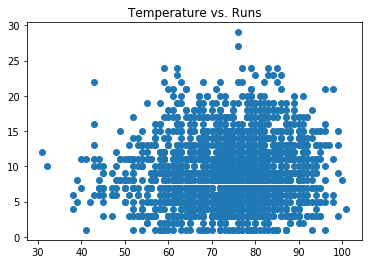

In [232]:
pyplot.scatter(merged_stats['temperature'], merged_stats['total_runs'])
pyplot.title("Temperature vs. Runs")
pyplot.show()

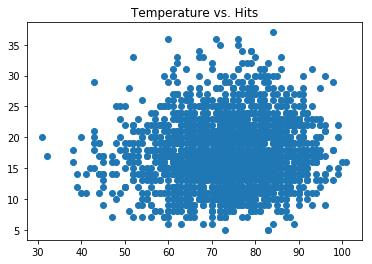

In [234]:
pyplot.scatter(merged_stats['temperature'], merged_stats['away_team_hits']+merged_stats['home_team_hits'])
pyplot.title("Temperature vs. Hits")
pyplot.show()

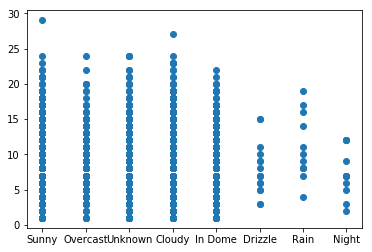

In [5]:
pyplot.scatter(baseball_stats.sky, baseball_stats.total_runs)
pyplot.show()

[[111.38431267   2.05042207]
 [  2.05042207  14.77943724]]
Variance X: 111.38431266522457
Variance Y: 14.779437243187328
Covariance: 2.050422074020669
Estimated Slope: 0.018408535501614077
Correlation Coefficient: 0.050536167711350034
Coefficient of Determination: 0.0025539042469496977


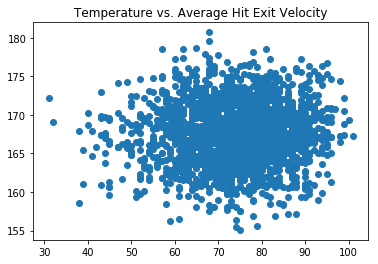

In [178]:
covMatrix = numpy.cov( list(merged_stats['temperature']), list(merged_stats['Home_Avg EV']  + merged_stats['Away_Avg EV']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['temperature']), list(merged_stats['Home_Avg EV'] + merged_stats['Away_Avg EV']) )
pyplot.title("Temperature vs. Average Hit Exit Velocity")
pyplot.show()

[[111.38431267  -1.21563026]
 [ -1.21563026  20.97282252]]
Variance X: 111.38431266522457
Variance Y: 20.972822521556168
Covariance: -1.2156302571497268
Estimated Slope: -0.010913837218742027
Correlation Coefficient: -0.025151335225994397
Coefficient of Determination: 0.0006325896636503466


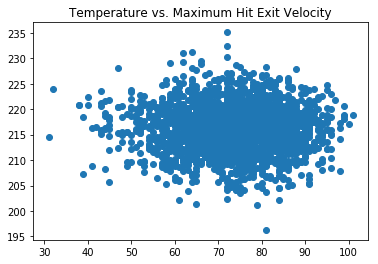

In [180]:
covMatrix = numpy.cov( list(merged_stats['temperature']), list(merged_stats['Home_Max EV']+merged_stats['Away_Max EV']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['temperature']), list(merged_stats['Home_Max EV']+merged_stats['Away_Max EV']) )
pyplot.title("Temperature vs. Maximum Hit Exit Velocity")
pyplot.show()

[[25.84401432 -0.85281303]
 [-0.85281303 14.77943724]]
Variance X: 25.84401432289375
Variance Y: 14.779437243187328
Covariance: -0.8528130330420097
Estimated Slope: -0.03299847393624724
Correlation Coefficient: -0.04363599601341168
Coefficient of Determination: 0.0019041001480824798


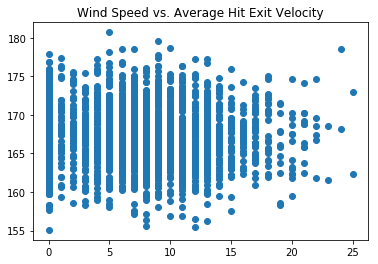

In [181]:
covMatrix = numpy.cov( list(merged_stats['wind_speed']), list(merged_stats['Home_Avg EV'] + merged_stats['Away_Avg EV']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['wind_speed']), list(merged_stats['Home_Avg EV'] + merged_stats['Away_Avg EV']) )
pyplot.title("Wind Speed vs. Average Hit Exit Velocity")
pyplot.show()

[[25.84401432  1.45767795]
 [ 1.45767795 37.7168301 ]]
Variance X: 25.84401432289375
Variance Y: 37.71683009624798
Covariance: 1.457677948106986
Estimated Slope: 0.05640292293197313
Correlation Coefficient: 0.046688938978058744
Coefficient of Determination: 0.002179857022896893


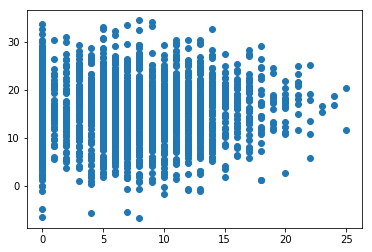

In [167]:
covMatrix = numpy.cov( list(merged_stats['wind_speed']), list(merged_stats['Home_Launch Angle']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['wind_speed']), list(merged_stats['Home_Launch Angle']) )
pyplot.show()

[[20.16410147  0.22765825]
 [ 0.22765825 37.7168301 ]]
Variance X: 20.16410147068305
Variance Y: 37.71683009624798
Covariance: 0.22765824936547874
Estimated Slope: 0.011290274932234157
Correlation Coefficient: 0.0082551764799495
Coefficient of Determination: 6.814793871511142e-05


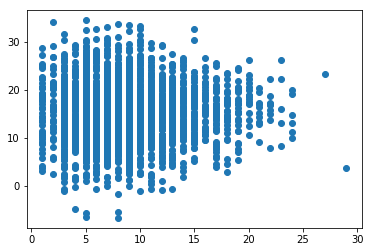

In [169]:
covMatrix = numpy.cov( list(merged_stats['total_runs']), list(merged_stats['Home_Launch Angle']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['total_runs']), list(merged_stats['Home_Launch Angle']) )
pyplot.show()

[[113.81833417  -0.29696731]
 [ -0.29696731   1.75764997]]
Variance X: 113.81833417058908
Variance Y: 1.7576499688759282
Covariance: -0.29696731426574535
Estimated Slope: -0.0026091342526649137
Correlation Coefficient: -0.02099598932856075
Coefficient of Determination: 0.00044083156788503694


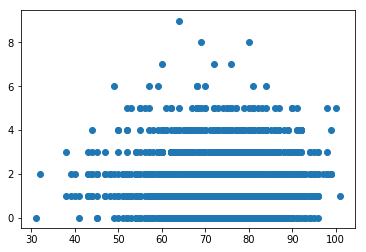

In [41]:
covMatrix = numpy.cov( list(merged_stats['temperature']), list(merged_stats['Barrels']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['temperature']), list(merged_stats['Barrels']) )
pyplot.show()

[[111.38431267  -0.68771479]
 [ -0.68771479 206.89691832]]
Variance X: 111.38431266522457
Variance Y: 206.89691831744832
Covariance: -0.6877147921172806
Estimated Slope: -0.006174251792389009
Correlation Coefficient: -0.004530220490686977
Coefficient of Determination: 2.0522897694240155e-05


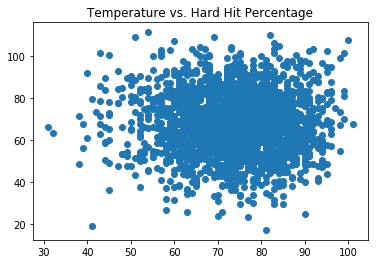

In [185]:
covMatrix = numpy.cov( list(merged_stats['temperature']), list(merged_stats['Home_Hard Hit %']+merged_stats['Away_Hard Hit %']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['temperature']), list(merged_stats['Home_Hard Hit %']+merged_stats['Away_Hard Hit %']) )
pyplot.title("Temperature vs. Hard Hit Percentage")
pyplot.show()

[[111.38431267  -3.54653178]
 [ -3.54653178  48.0555566 ]]
Variance X: 111.38431266522457
Variance Y: 48.055556598437285
Covariance: -3.546531783225188
Estimated Slope: -0.031840496191637
Correlation Coefficient: -0.04847524756795954
Coefficient of Determination: 0.002349849626774967


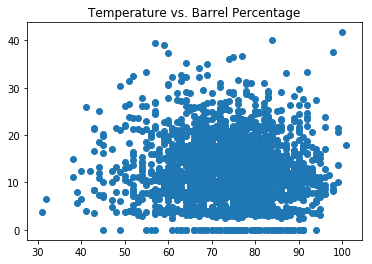

In [187]:
covMatrix = numpy.cov( list(merged_stats['temperature']), list(merged_stats['Home_Barrel %']+merged_stats['Away_Barrel %']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['temperature']), list(merged_stats['Home_Barrel %']+merged_stats['Away_Barrel %']) )
pyplot.title("Temperature vs. Barrel Percentage")
pyplot.show()

[[111.38431267  -2.90413663]
 [ -2.90413663  75.5739587 ]]
Variance X: 111.38431266522457
Variance Y: 75.57395869968522
Covariance: -2.904136625811103
Estimated Slope: -0.026073120678490366
Correlation Coefficient: -0.03165329632149506
Coefficient of Determination: 0.0010019311680163725


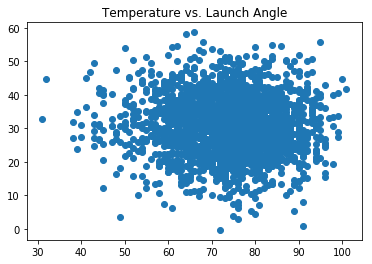

In [188]:
covMatrix = numpy.cov( list(merged_stats['temperature']), list(merged_stats['Home_Launch Angle'] + merged_stats['Away_Launch Angle']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['temperature']), list(merged_stats['Home_Launch Angle'] + merged_stats['Away_Launch Angle']) )
pyplot.title("Temperature vs. Launch Angle")
pyplot.show()

[[25.48006057 -0.91170861]
 [-0.91170861 10.36326147]]
Variance X: 25.48006057362931
Variance Y: 10.36326146585271
Covariance: -0.9117086113568283
Estimated Slope: -0.03578125761209551
Correlation Coefficient: -0.05610577955720664
Coefficient of Determination: 0.003147858499721867


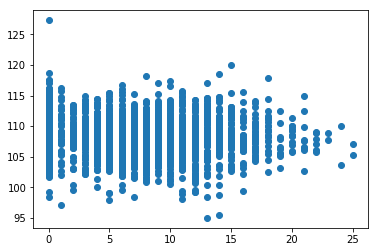

In [48]:
covMatrix = numpy.cov( list(merged_stats['wind_speed']), list(merged_stats['Max EV']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['wind_speed']), list(merged_stats['Max EV']) )
pyplot.show()

[[ 0.20604726  0.05025211]
 [ 0.05025211 10.36326147]]
Variance X: 0.20604726139173216
Variance Y: 10.36326146585271
Covariance: 0.05025210876282859
Estimated Slope: 0.24388632211563577
Correlation Coefficient: 0.034389244903072574
Coefficient of Determination: 0.001182620165003503


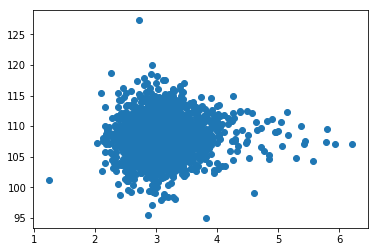

In [49]:
covMatrix = numpy.cov( list(merged_stats['game_hours_dec']), list(merged_stats['Max EV']) )
print(covMatrix)
xVar = covMatrix[0][0]
yVar = covMatrix[1][1]
cov = covMatrix[1][0]
m = (cov/xVar)
r = (cov)/(numpy.sqrt(xVar) * numpy.sqrt(yVar))
r2 = r ** 2
print("Variance X: " + str(xVar))
print("Variance Y: " + str(yVar))
print("Covariance: " + str(cov))
print("Estimated Slope: " + str(m))
print("Correlation Coefficient: " + str(r))
print("Coefficient of Determination: " + str(r2))
pyplot.scatter( list(merged_stats['game_hours_dec']), list(merged_stats['Max EV']) )
pyplot.show()

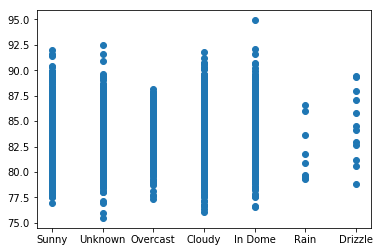

In [53]:
pyplot.scatter( list(merged_stats['sky']), list(merged_stats['Avg EV']) )
pyplot.show()

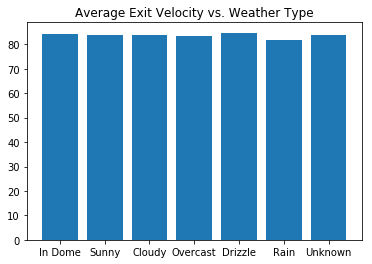

In [195]:
#Avg EV by weather type
sky_counter = Counter(merged_stats.sky)
sky_ev_dict = {'In Dome': 0, 'Sunny': 0, 'Cloudy': 0, 'Overcast': 0, 'Drizzle': 0, 'Rain': 0, 'Unknown': 0}

for x in merged_stats.values:
    sky_ev_dict[x[20]] += x[32] / sky_counter[x[20]]

pyplot.bar(sky_ev_dict.keys(), sky_ev_dict.values())
pyplot.title("Average Exit Velocity vs. Weather Type")
pyplot.show()

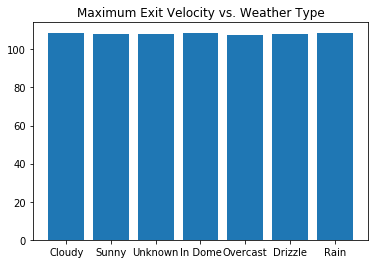

In [192]:
#Max EV by weather type
sky_counter = Counter(merged_stats.sky)
sky_ev_dict = {'Cloudy': 0, 'Sunny': 0, 'Unknown': 0, 'In Dome': 0, 'Overcast': 0, 'Drizzle': 0, 'Rain': 0}

for x in merged_stats.values:
    sky_ev_dict[x[20]] += x[31] / sky_counter[x[20]]

pyplot.bar(sky_ev_dict.keys(), sky_ev_dict.values())
pyplot.title("Maximum Exit Velocity vs. Weather Type")
pyplot.show()

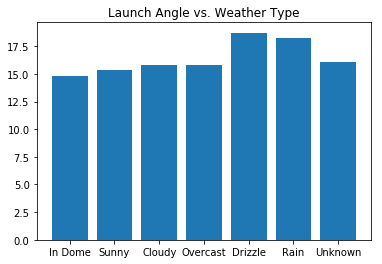

In [194]:
#Launch Angle by weather type
sky_counter = Counter(merged_stats.sky)
sky_ev_dict = {'In Dome': 0, 'Sunny': 0, 'Cloudy': 0, 'Overcast': 0, 'Drizzle': 0, 'Rain': 0, 'Unknown': 0}

for x in merged_stats.values:
    sky_ev_dict[x[20]] += x[33] / sky_counter[x[20]]

pyplot.bar(sky_ev_dict.keys(), sky_ev_dict.values())
pyplot.title("Launch Angle vs. Weather Type")
pyplot.show()

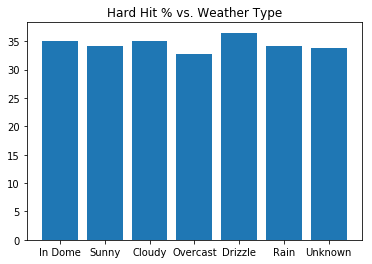

In [196]:
#Hard Hit % by weather type
sky_counter = Counter(merged_stats.sky)
sky_ev_dict = {'In Dome': 0, 'Sunny': 0, 'Cloudy': 0, 'Overcast': 0, 'Drizzle': 0, 'Rain': 0, 'Unknown': 0}

for x in merged_stats.values:
    sky_ev_dict[x[20]] += x[38] / sky_counter[x[20]]

pyplot.bar(sky_ev_dict.keys(), sky_ev_dict.values())
pyplot.title("Hard Hit % vs. Weather Type")
pyplot.show()

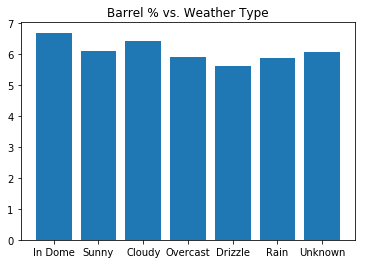

In [197]:
#Barrel % by weather type
sky_counter = Counter(merged_stats.sky)
sky_ev_dict = {'In Dome': 0, 'Sunny': 0, 'Cloudy': 0, 'Overcast': 0, 'Drizzle': 0, 'Rain': 0, 'Unknown': 0}

for x in merged_stats.values:
    sky_ev_dict[x[20]] += x[30] / sky_counter[x[20]]

pyplot.bar(sky_ev_dict.keys(), sky_ev_dict.values())
pyplot.title("Barrel % vs. Weather Type")
pyplot.show()

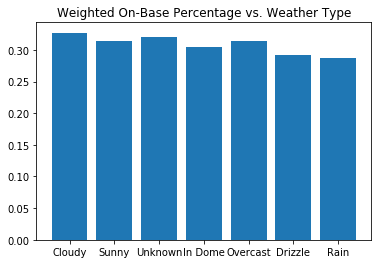

In [198]:
#WOBA by weather type
sky_counter = Counter(merged_stats.sky)
sky_ev_dict = {'Cloudy': 0, 'Sunny': 0, 'Unknown': 0, 'In Dome': 0, 'Overcast': 0, 'Drizzle': 0, 'Rain': 0}

for x in merged_stats.values:
    sky_ev_dict[x[20]] += x[37] / sky_counter[x[20]]

pyplot.bar(sky_ev_dict.keys(), sky_ev_dict.values())
pyplot.title("Weighted On-Base Percentage vs. Weather Type")
pyplot.show()

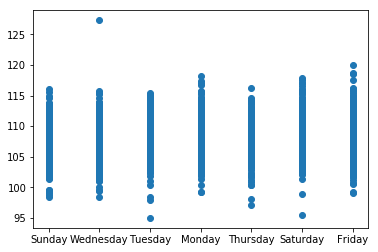

In [69]:
pyplot.scatter( list(merged_stats['day_of_week']), list(merged_stats['Max EV']) )
pyplot.show()

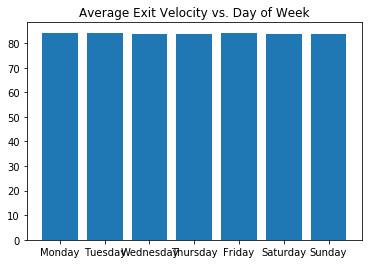

In [200]:
#Avg EV by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[32] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.title("Average Exit Velocity vs. Day of Week")
pyplot.show()

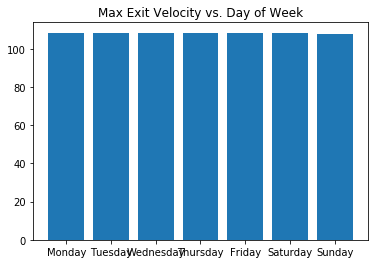

In [199]:
#Max EV by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[31] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.title("Max Exit Velocity vs. Day of Week")
pyplot.show()

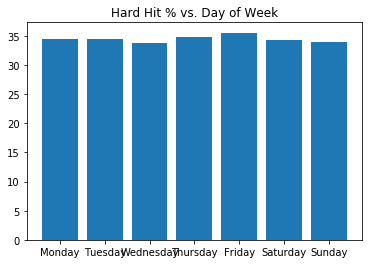

In [201]:
#Hard Hit % by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[38] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.title("Hard Hit % vs. Day of Week")
pyplot.show()

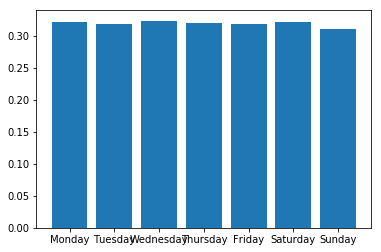

In [108]:
#WOBA by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[37] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

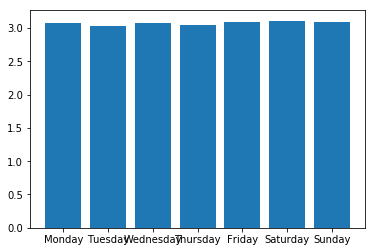

In [109]:
#game_hours_dec by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[22] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

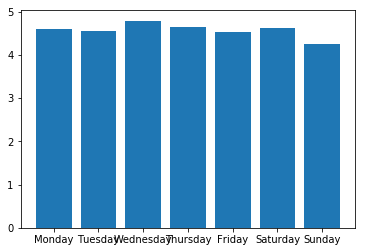

In [110]:
#home_team_runs by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[13] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

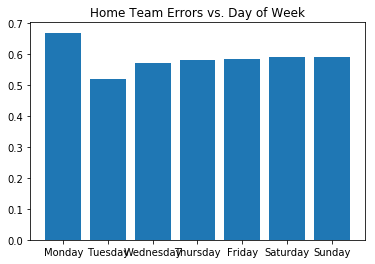

In [202]:
#home_team_errors by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[11] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.title("Home Team Errors vs. Day of Week")
pyplot.show()

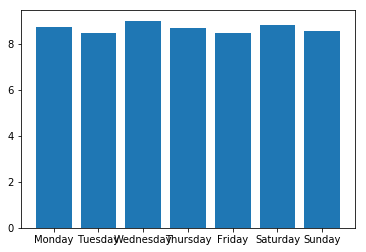

In [112]:
#home_team_hits by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[12] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

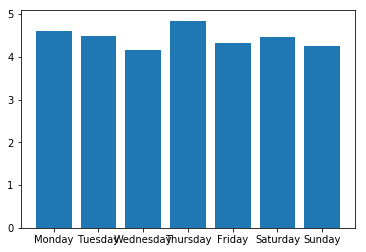

In [113]:
#away_team_runs by Day of Week
day_counter = Counter(merged_stats.day_of_week)
day_ev_dict = {'Monday': 0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for x in merged_stats.values:
    day_ev_dict[x[16]] += x[6] / day_counter[x[16]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

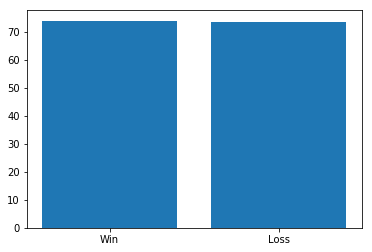

In [114]:
#game_hours_dec by home_team_outcome
day_counter = Counter(merged_stats.home_team_outcome)
day_ev_dict = {'Win': 0, 'Loss': 0}

for x in merged_stats.values:
    day_ev_dict[x[26]] += x[17] / day_counter[x[26]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

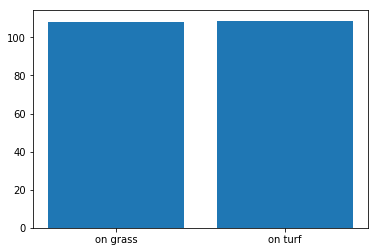

In [115]:
#Max EV by field_type
day_counter = Counter(merged_stats.field_type)
day_ev_dict = {'on grass': 0, 'on turf': 0}

for x in merged_stats.values:
    day_ev_dict[x[8]] += x[31] / day_counter[x[8]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

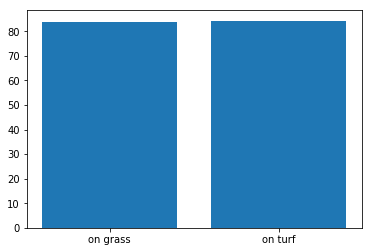

In [116]:
#Avg EV by field_type
day_counter = Counter(merged_stats.field_type)
day_ev_dict = {'on grass': 0, 'on turf': 0}

for x in merged_stats.values:
    day_ev_dict[x[8]] += x[32] / day_counter[x[8]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

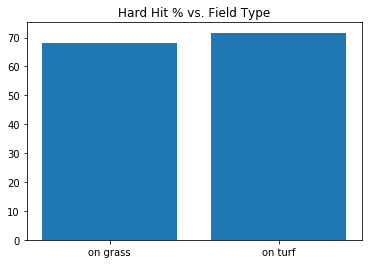

In [208]:
#Hard Hit % by field_type
day_counter = Counter(merged_stats.field_type)
day_ev_dict = {'on grass': 0, 'on turf': 0}

for x in merged_stats.values:
    day_ev_dict[x[8]] += (x[38] + x[49]) / day_counter[x[8]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.title("Hard Hit % vs. Field Type")
pyplot.show()

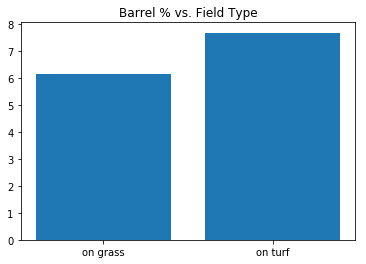

In [214]:
#Barrel % by field_type
day_counter = Counter(merged_stats.field_type)
day_ev_dict = {'on grass': 0, 'on turf': 0}

for x in merged_stats.values:
    day_ev_dict[x[8]] += x[30] / day_counter[x[8]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.title("Barrel % vs. Field Type")
pyplot.show()

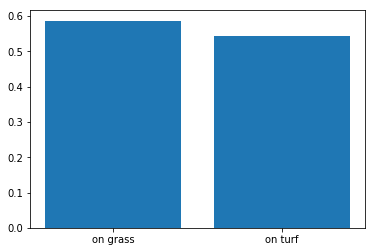

In [119]:
#away_team_error by field_type
day_counter = Counter(merged_stats.field_type)
day_ev_dict = {'on grass': 0, 'on turf': 0}

for x in merged_stats.values:
    day_ev_dict[x[8]] += x[4] / day_counter[x[8]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.show()

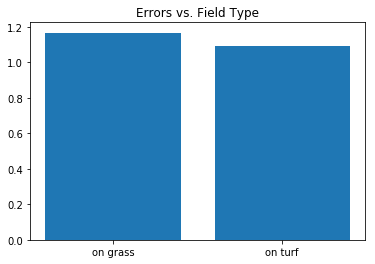

In [213]:
#error by field_type
day_counter = Counter(merged_stats.field_type)
day_ev_dict = {'on grass': 0, 'on turf': 0}

for x in merged_stats.values:
    day_ev_dict[x[8]] += (x[11] + x[4]) / day_counter[x[8]]

pyplot.bar(day_ev_dict.keys(), day_ev_dict.values())
pyplot.title("Errors vs. Field Type")
pyplot.show()

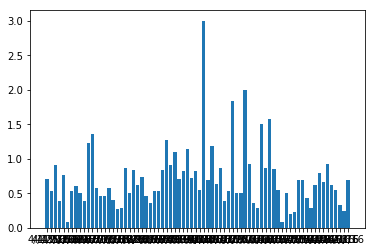

In [129]:
#Mets hits by game
day_counter = Counter(merged_stats.date)
mets_date_dict = {}
for x in merged_stats.values:
    if(x[10] == 'New York Mets'):
        mets_date_dict[x[7]] = 0

for x in merged_stats.values:
    if(x[10] == 'New York Mets'):
        mets_date_dict[x[7]] += x[12] / day_counter[x[7]]

pyplot.bar(mets_date_dict.keys(), mets_date_dict.values())
pyplot.show()

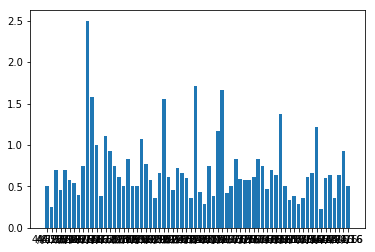

In [130]:
#Padres hits by game
day_counter = Counter(merged_stats.date)
padres_date_dict = {}
for x in merged_stats.values:
    if(x[10] == 'San Diego Padres'):
        padres_date_dict[x[7]] = 0

for x in merged_stats.values:
    if(x[10] == 'San Diego Padres'):
        padres_date_dict[x[7]] += x[12] / day_counter[x[7]]

pyplot.bar(padres_date_dict.keys(), padres_date_dict.values())
pyplot.show()

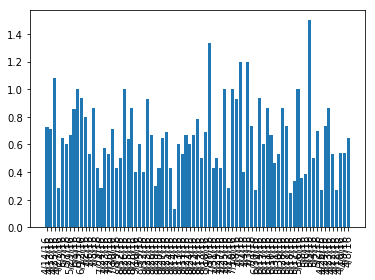

In [243]:
#Blue Jays hits by game
day_counter = Counter(merged_stats.date)
bluejays_date_dict = {}
for x in merged_stats.values:
    if(x[10] == 'Blue Jays'):
        bluejays_date_dict[x[7]] = 0

for x in merged_stats.values:
    if(x[10] == 'Blue Jays'):
        bluejays_date_dict[x[7]] += x[12] / day_counter[x[7]]

pyplot.bar(bluejays_date_dict.keys(), bluejays_date_dict.values())
pyplot.xticks(rotation='vertical')
pyplot.show()

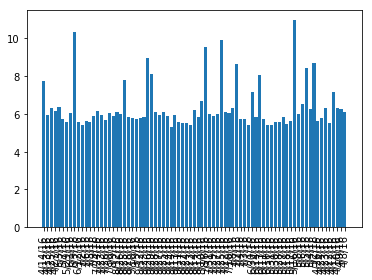

In [246]:
#Blue Jays hits by game
day_counter = Counter(merged_stats.date)
bluejays_date_dict = {}
for x in merged_stats.values:
    if(x[10] == 'Blue Jays'):
        bluejays_date_dict[x[7]] = 0

for x in merged_stats.values:
    if(x[10] == 'Blue Jays'):
        bluejays_date_dict[x[7]] += x[32] / day_counter[x[7]]

pyplot.bar(bluejays_date_dict.keys(), bluejays_date_dict.values())
pyplot.xticks(rotation='vertical')
pyplot.show()